In [44]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def find_translation(image1, image2):
    #image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

    #image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    # Use cross-correlation to find the translation
    result = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)

    min_val,max_val,min_loc, max_loc = cv2.minMaxLoc(result)
    print("Minimum correlation value:", min_val)
    print("Maximum correlation value:", max_val)
    shift_x = max_loc[0]
    plt.figure()
    plt.imshow(result)
    return shift_x

def stack_images_along_trajectory(image_folder, overlap_percent=0.2):
    # Load images from the specified folder
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])
    images = [cv2.imread(os.path.join(image_folder, file)) for file in image_files]

    # Determine the overlap region size
    overlap_size = int(images[0].shape[1] * overlap_percent)

    # Initialize the stitched image with the first image
    stitched_image = images[0]

    # Iterate over the remaining images
    for i in range(1, len(images)):
        # Extract overlapping regions
        overlap_region1 = stitched_image[:, -overlap_size:]
        overlap_region2 = images[i][:, :overlap_size]

        # Find the translation (shift)
        shift_x = find_translation(overlap_region1, overlap_region2)
        print(shift_x)

        # Shift the current image
        translation_matrix = np.float32([[1, 0, shift_x], [0, 1, 0]])
        shifted_image = cv2.warpAffine(images[i], translation_matrix, (images[i].shape[1], images[i].shape[0]))

        # Stack the shifted image onto the stitched image
        stitched_image = np.hstack((stitched_image[:, :-overlap_size], shifted_image))

    return stitched_image

Minimum correlation value: -0.05509606748819351
Maximum correlation value: -0.05509606748819351
0
Minimum correlation value: 0.2638847529888153
Maximum correlation value: 0.2638847529888153
0
Minimum correlation value: 0.13964195549488068
Maximum correlation value: 0.13964195549488068
0
Minimum correlation value: -0.0008091047056950629
Maximum correlation value: -0.0008091047056950629
0
Minimum correlation value: 0.01382940262556076
Maximum correlation value: 0.01382940262556076
0
Minimum correlation value: -0.06254671514034271
Maximum correlation value: -0.06254671514034271
0
Minimum correlation value: -0.05441441759467125
Maximum correlation value: -0.05441441759467125
0
Minimum correlation value: 0.07538111507892609
Maximum correlation value: 0.07538111507892609
0
Minimum correlation value: 0.08860742300748825
Maximum correlation value: 0.08860742300748825
0
Minimum correlation value: 0.11652610450983047
Maximum correlation value: 0.11652610450983047
0
Minimum correlation value: -0.

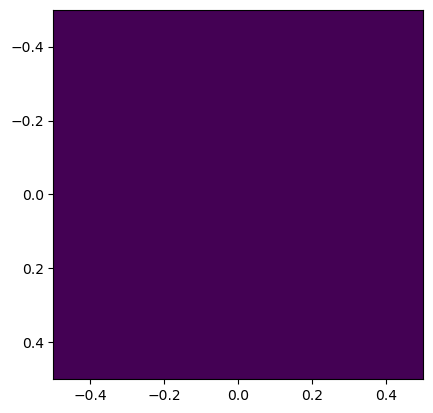

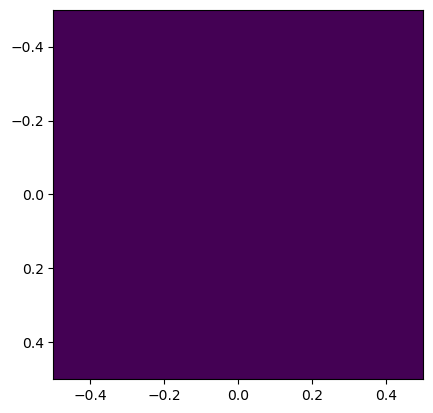

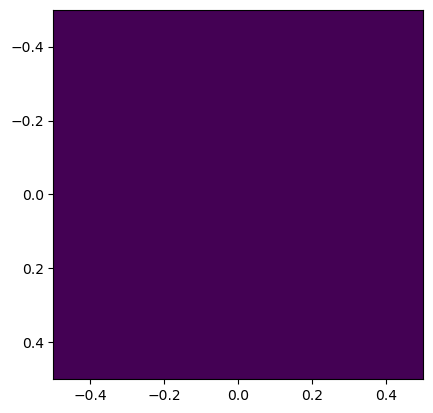

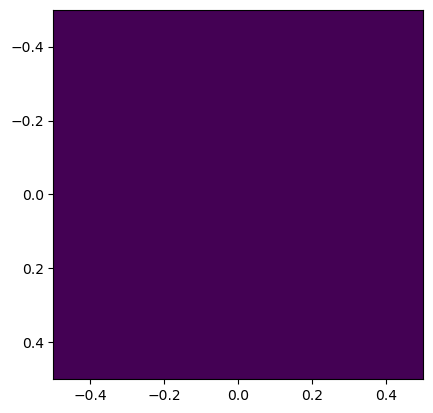

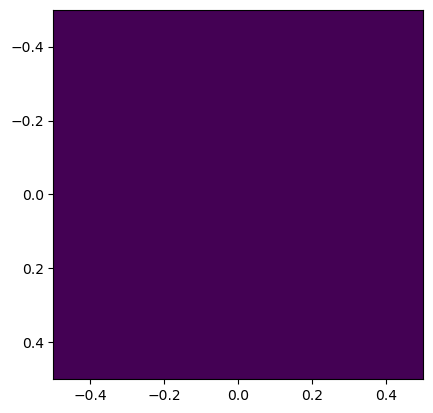

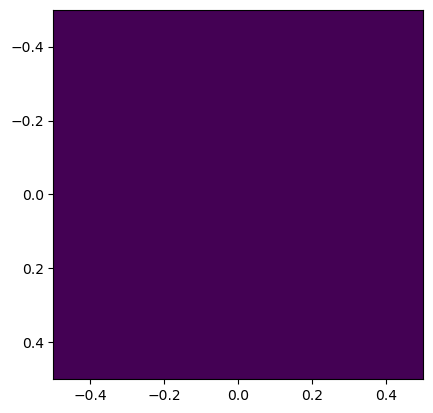

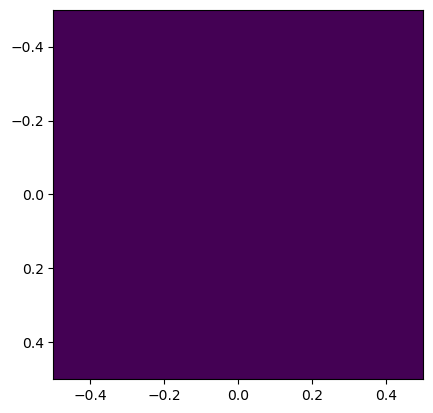

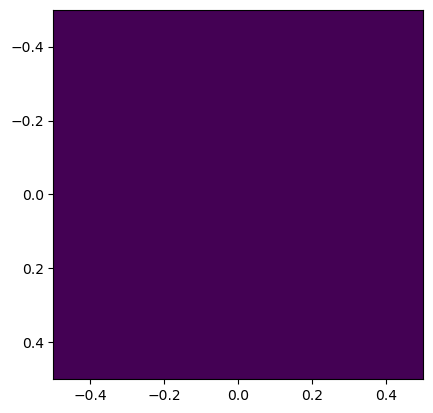

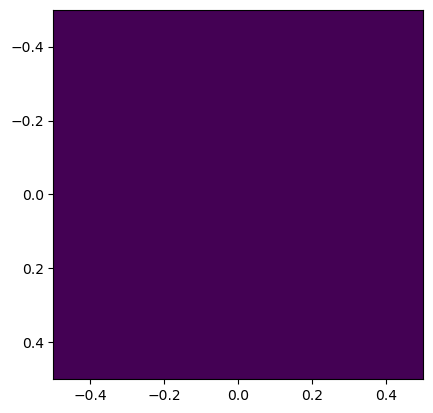

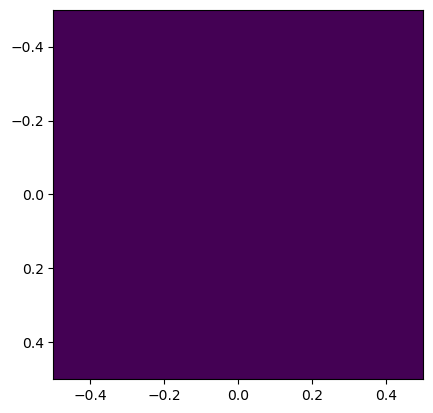

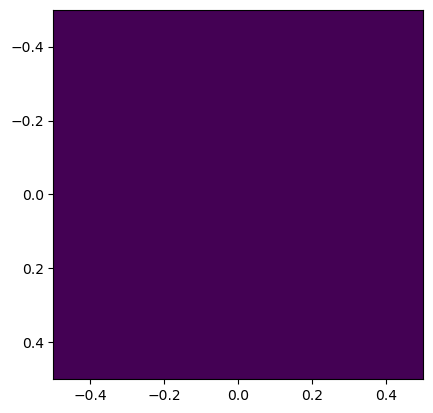

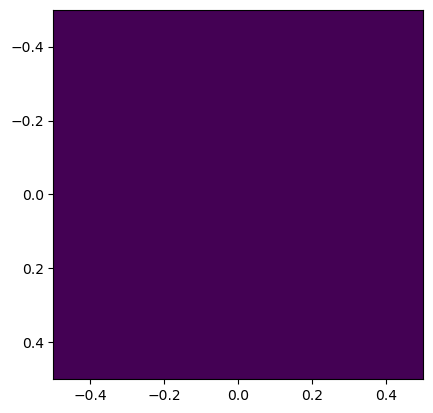

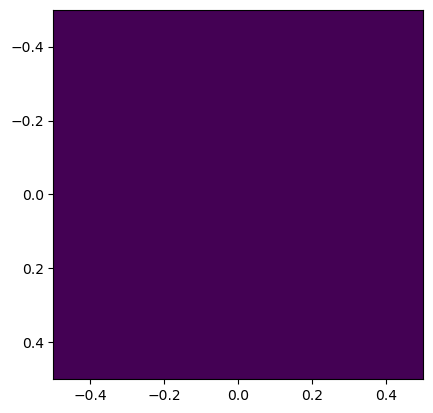

In [46]:
image_folder = '/home/uwr/Desktop/2023_UWR/Analysis/processed_data/Nov_21/3_reduced'
stitched_result = stack_images_along_trajectory(image_folder)

# Display the result


In [7]:
cv2.imwrite("result.png",stitched_result)

True

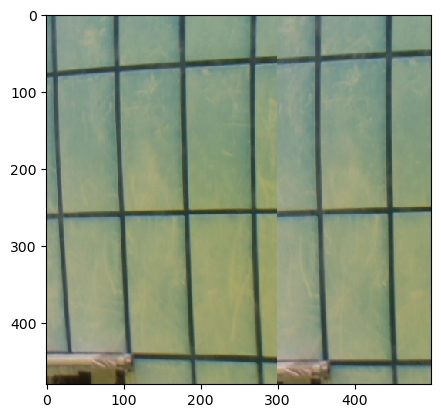

In [15]:
plt.imshow(stitched_result[:,4500:5000])